In [1]:
import torch
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import imageio

In [32]:
# Load the file
pt_file = torch.load("unet_results.pt")

# Print the head of the file
unet_loss_curve = pt_file['loss_curve']
y = list(unet_loss_curve)

In [28]:
# create x ticks for plot
x = [x for x in range(601)]
x = x[80::10]
x = x[15:(15+100)]
x = [str(x) for x in x]

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_17522/4158422061.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


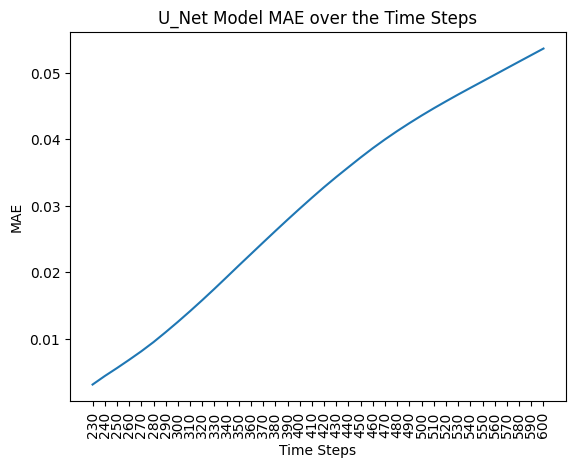

In [100]:
ax = plt.axes()
ax.plot(x,y)
plt.title('U_Net Model MAE over the Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('MAE')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig(f'pics/unet_mae.png')
plt.show()

In [66]:
pt_file['trues'].shape

(10, 38, 300, 300)

In [67]:
pt_file['preds'].shape

(10, 38, 1, 300, 300)

In [101]:
# mae={}
# for i in range(10):
#     trues = pt_file['trues'][i][0]
#     preds = pt_file['preds'][i][0][0]
#     mae[i] = abs(trues - preds).mean()
#     print(mae[i])
    

In [102]:
# trues.shape

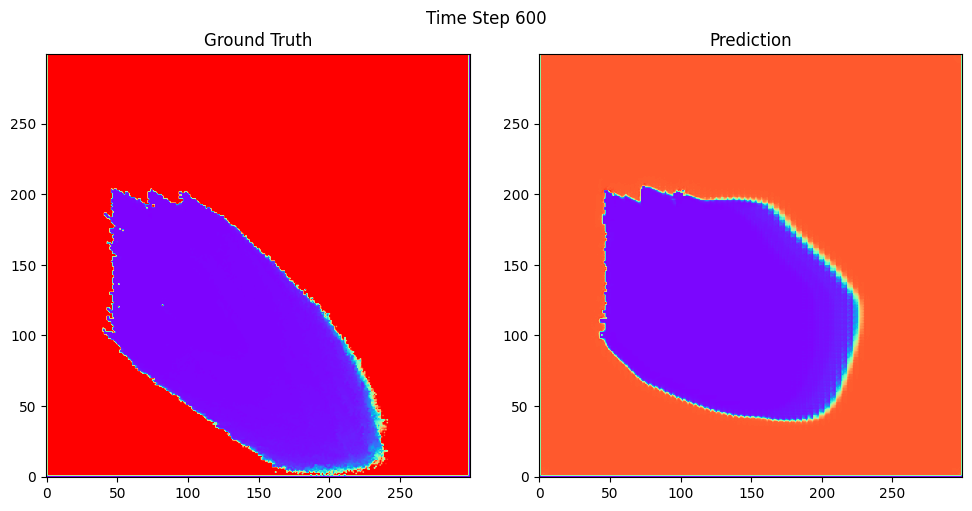

In [98]:
# plot and save each timestamp picture
fig, axs = plt.subplots(1, 2,figsize=(10,5))

# generate png for each timestamp containing true and pred
filenames = []
for i in range(len(x)):
    true = pt_file['trues'][0][i]
    pred = pt_file['preds'][0][i][0]
    axs[0].imshow(true,cmap='rainbow',origin="lower")
    axs[1].imshow(pred,cmap='rainbow',origin="lower")
    axs[0].set_title('Ground Truth')
    axs[1].set_title('Prediction')
    plt.suptitle(f'Time Step {x[i]}')
    plt.savefig(f'pics/{i}.png')
    filenames.append(f'pics/{i}.png')
    

fig.tight_layout() 
plt.show()

In [99]:

# make animation
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('pics/movie.gif', images)

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_17522/2315378574.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
